In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 

from xwp_rotation.rotate import pyvips_rotate

In [2]:
size = 64

In [3]:
grid_beta  = np.load("grid_beta.npy")
grid_delta = np.load("grid_delta.npy")

_beta  = np.zeros((size**2,size))
_delta = np.zeros((size**2,size))

for i in range(size):
    _beta[64*i:64*(i+1),:]  = grid_beta[:,:,i]
    _delta[64*i:64*(i+1),:] = grid_delta[:,:,i]

In [4]:
f = h5py.File("Y.h5",'r')
dset = f['Y_vec']

_y = np.zeros(dset.shape)
dset.read_direct(_y,np.s_[:,:],np.s_[:,:])

f.close()

_y = _y[:,0]
_y = _y.reshape((64,64))

In [5]:
f = h5py.File("X.h5",'r')
dset = f['X_vec']

_x = np.zeros(dset.shape)
dset.read_direct(_x,np.s_[:,:],np.s_[:,:])

f.close()
_x = _x[:,0]
_x = _x.reshape((64,64))

True


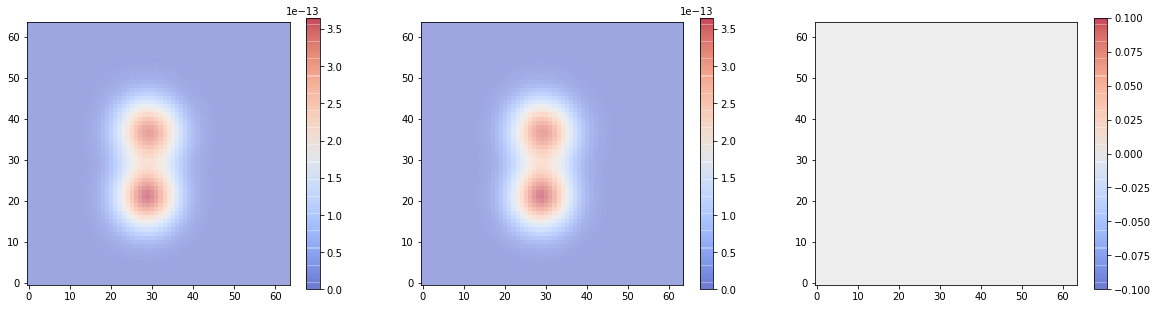

In [6]:
print(np.allclose(_beta[:64,:],_x))

plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(grid_beta[:,:,0], alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow(_x, alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(_beta[:64,:] - _x, alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)

In [7]:
temp = np.zeros((64,64))
temp[:,:] = np.copy(_beta[:64,:])
_beta_rot = pyvips_rotate(temp,30)
del temp

True


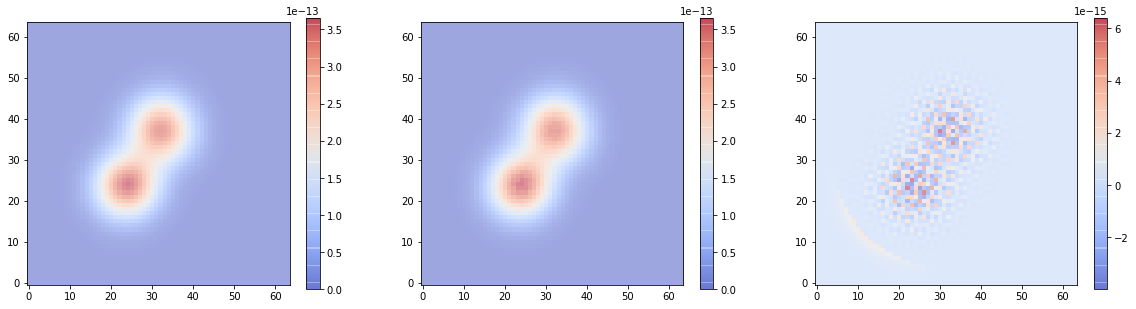

In [8]:
print(np.allclose(_beta_rot,_y))

plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(_beta_rot, alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow(_y, alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(_beta_rot - _y, alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)